# CALL THE LIBRARY

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# UPLOAD THE TEST AND TRAIN DATA

In [ ]:
 url ='https://raw.githubusercontent.com/DataScience75/batch89/main/train.csv'
train= pd.read_csv(url)
print(train.head(2))


In [4]:
test = pd.read_csv("C:/Users/Hira singh/Downloads/ML Test/test.csv")
print(test.head(2))

             datetime  season  holiday  workingday  weather   temp  atemp  \
0  2012-06-30 1:00:00       3        0           0        3  26.24  28.79   
1  2012-06-30 2:00:00       3        0           0        2  26.24  28.79   

   humidity  windspeed  casual  registered  
0      89.0    15.0013       3          55  
1      89.0     0.0000       7          54  


In [8]:
train.count()

datetime      12980
season        12980
holiday       12980
workingday    12980
weather       12980
temp          12980
atemp         12980
humidity      12980
windspeed     12980
casual        12980
registered    12980
count         12980
dtype: int64

In [7]:
test.count()

datetime      4399
season        4399
holiday       4399
workingday    4399
weather       4399
temp          4399
atemp         4399
humidity      4399
windspeed     4399
casual        4399
registered    4399
dtype: int64

In [11]:
test.describe

<bound method NDFrame.describe of                  datetime  season  holiday  workingday  weather   temp  \
0      2012-06-30 1:00:00       3        0           0        3  26.24   
1      2012-06-30 2:00:00       3        0           0        2  26.24   
2      2012-06-30 3:00:00       3        0           0        2  26.24   
3      2012-06-30 4:00:00       3        0           0        2  25.42   
4      2012-06-30 5:00:00       3        0           0        1  26.24   
...                   ...     ...      ...         ...      ...    ...   
4394  2012-12-31 19:00:00       1        0           1        2  10.66   
4395  2012-12-31 20:00:00       1        0           1        2  10.66   
4396  2012-12-31 21:00:00       1        0           1        1  10.66   
4397  2012-12-31 22:00:00       1        0           1        1  10.66   
4398  2012-12-31 23:00:00       1        0           1        1  10.66   

       atemp  humidity  windspeed  casual  registered  
0     28.790      89.

In [13]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered'],
      dtype='object')

In [14]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

# FLOATING CHANGE  

In [16]:
train['datetime'] = pd.to_datetime(train['datetime'])


In [18]:
train_first_18_months = train[train['datetime'] < train['datetime'].iloc[0] + pd.DateOffset(months=18)]


In [19]:
train_first_18_months['hour'] = train_first_18_months['datetime'].dt.hour
train_first_18_months['day'] = train_first_18_months['datetime'].dt.day
train_first_18_months['month'] = train_first_18_months['datetime'].dt.month


In [21]:
X= ['temp', 'atemp', 'humidity', 'windspeed', 'hour', 'day', 'month']


# SPLIT THE DATA 

In [22]:
X = train_first_18_months[X]
y = train_first_18_months['count']


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# CREAT A MODEL

In [24]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

# TRAIN DATA PREDICTIONS

In [25]:
predictions = model.predict(X_test)


In [26]:
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 6385.354834141157


# PLOTTING

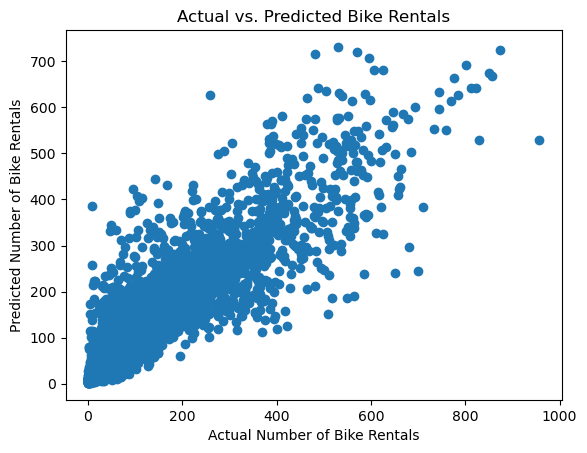

In [27]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Number of Bike Rentals')
plt.ylabel('Predicted Number of Bike Rentals')
plt.title('Actual vs. Predicted Bike Rentals')
plt.show()

# Test file Prediction 

In [28]:
test['datetime'] = pd.to_datetime(test['datetime'])
test['hour'] = test['datetime'].dt.hour
test['day'] = test['datetime'].dt.day
test['month'] = test['datetime'].dt.month


In [29]:
X1 = ['temp', 'atemp', 'humidity', 'windspeed', 'hour', 'day', 'month']


In [30]:
test_predictions = model.predict(test[X1])


In [31]:
test['predicted_count'] = test_predictions


In [32]:
print(test[['datetime', 'predicted_count']])

                datetime  predicted_count
0    2012-06-30 01:00:00            37.19
1    2012-06-30 02:00:00            25.82
2    2012-06-30 03:00:00            20.75
3    2012-06-30 04:00:00            11.49
4    2012-06-30 05:00:00            21.33
...                  ...              ...
4394 2012-12-31 19:00:00           145.96
4395 2012-12-31 20:00:00            92.50
4396 2012-12-31 21:00:00            50.53
4397 2012-12-31 22:00:00            67.61
4398 2012-12-31 23:00:00            38.04

[4399 rows x 2 columns]
